<a href="https://colab.research.google.com/github/SaumyaKumar-09/Machine-Learning-Practice/blob/main/Digit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Handwritten Numeric Digit Prediction**


**The digit dataset contains digit images of 8×8 pixels. The images attributes of the datasets stores 8×8 arrays of grayscale values for each image. We will use these arrays to visualise the numeric digits. The target attribute of the dataset stores the digit each image represents.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_digits

In [4]:
df=load_digits()

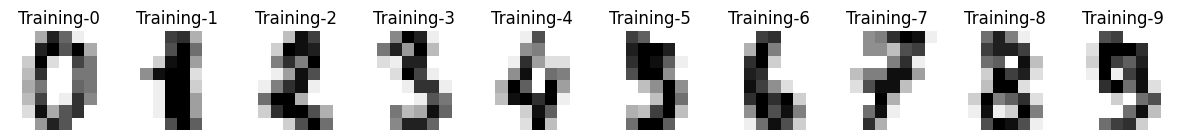

In [5]:
_,axes=plt.subplots(nrows=1, ncols=10, figsize=(15,7))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training-%i" %label)

## **Data Preprocessing**
**Flatten Image**

![Flatten image](https://i.stack.imgur.com/lmrin.png)

In [26]:
df.images.shape

(1797, 8, 8)

In [27]:
print(df.images[0])
print(df.images[0].shape)

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
(8, 8)


In [28]:
n_samples=len(df.images)
data=df.images.reshape((n_samples,-1))

In [29]:
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [30]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [31]:
data[0].shape

(64,)

In [32]:
data.shape

(1797, 64)

### **Scaling Image Data**

In [33]:
data.min()

0.0

In [34]:
data.max()

16.0

In [35]:
data=data/16

In [36]:
data.min()

0.0

In [37]:
data.max()

1.0

In [39]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

### **Train Test Split Data**

In [40]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test=train_test_split(data,df.target,test_size=0.3,random_state=2529)

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

### **Model Fitting**

In [44]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [45]:
model.fit(X_train,y_train)

RandomForestClassifier()

### **Predict Test Data**

In [46]:
y_pred=model.predict(X_test)

In [47]:
y_pred

array([1, 9, 4, 1, 1, 0, 6, 9, 6, 0, 0, 9, 6, 4, 5, 6, 8, 8, 8, 3, 0, 1,
       2, 0, 8, 3, 1, 1, 7, 5, 0, 4, 1, 9, 5, 5, 4, 7, 1, 5, 7, 5, 7, 3,
       3, 7, 6, 1, 9, 8, 0, 9, 7, 1, 9, 3, 4, 0, 8, 3, 0, 9, 8, 1, 5, 5,
       0, 5, 7, 9, 5, 2, 6, 8, 4, 2, 2, 2, 8, 0, 4, 2, 1, 0, 7, 5, 5, 2,
       1, 4, 9, 2, 4, 8, 2, 4, 9, 5, 4, 5, 1, 7, 1, 7, 7, 4, 2, 0, 0, 5,
       1, 5, 7, 0, 1, 1, 5, 2, 5, 6, 8, 5, 7, 1, 1, 1, 9, 6, 9, 8, 7, 8,
       7, 4, 7, 2, 9, 1, 8, 1, 2, 0, 8, 1, 2, 6, 3, 2, 3, 3, 1, 2, 1, 6,
       9, 8, 9, 1, 4, 1, 7, 4, 5, 9, 1, 0, 6, 1, 7, 8, 1, 0, 7, 2, 3, 5,
       5, 5, 1, 9, 5, 9, 5, 0, 1, 0, 3, 2, 9, 0, 8, 3, 5, 7, 3, 9, 8, 7,
       4, 1, 6, 7, 8, 2, 6, 0, 6, 0, 7, 3, 1, 6, 2, 4, 6, 8, 5, 6, 2, 6,
       5, 8, 7, 4, 2, 8, 9, 9, 3, 1, 4, 4, 7, 9, 1, 6, 3, 1, 9, 6, 4, 5,
       0, 4, 2, 7, 0, 2, 0, 3, 8, 1, 2, 9, 1, 5, 2, 7, 0, 7, 9, 6, 6, 3,
       1, 6, 3, 3, 6, 1, 1, 3, 5, 7, 8, 1, 5, 1, 0, 3, 7, 2, 7, 8, 7, 8,
       8, 3, 3, 5, 9, 5, 7, 2, 0, 7, 7, 0, 6, 4, 1,

### **Model Accuracy**

In [52]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [53]:
confusion_matrix(y_test,y_pred)

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 64,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 61,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 49,  0,  2,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 54,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 56,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  1, 50,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 50,  0,  0],
       [ 0,  5,  0,  1,  0,  0,  0,  1, 46,  0],
       [ 0,  0,  0,  1,  0,  2,  0,  1,  2, 47]])

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.93      1.00      0.96        64
           2       1.00      1.00      1.00        61
           3       0.96      0.94      0.95        52
           4       0.96      1.00      0.98        54
           5       0.92      0.97      0.94        58
           6       1.00      0.96      0.98        52
           7       0.94      1.00      0.97        50
           8       0.94      0.87      0.90        53
           9       1.00      0.89      0.94        53

    accuracy                           0.96       540
   macro avg       0.97      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



In [56]:
print("Model Accuracy:")
accuracy_score(y_pred,y_test)*100

Model Accuracy:


96.29629629629629